# ANLY590 Homework 2
## Hongyang Zheng

### Part1 Feedforward: Building a ReLU neural network

#### Question 1 

Consider the rectified linear activation function : $h_j = max(0, a_j )$

Draw a network with:
* 2 inputs
* 1 hidden layers with 3 hidden units and a 
* 1-class output (for binary classification)

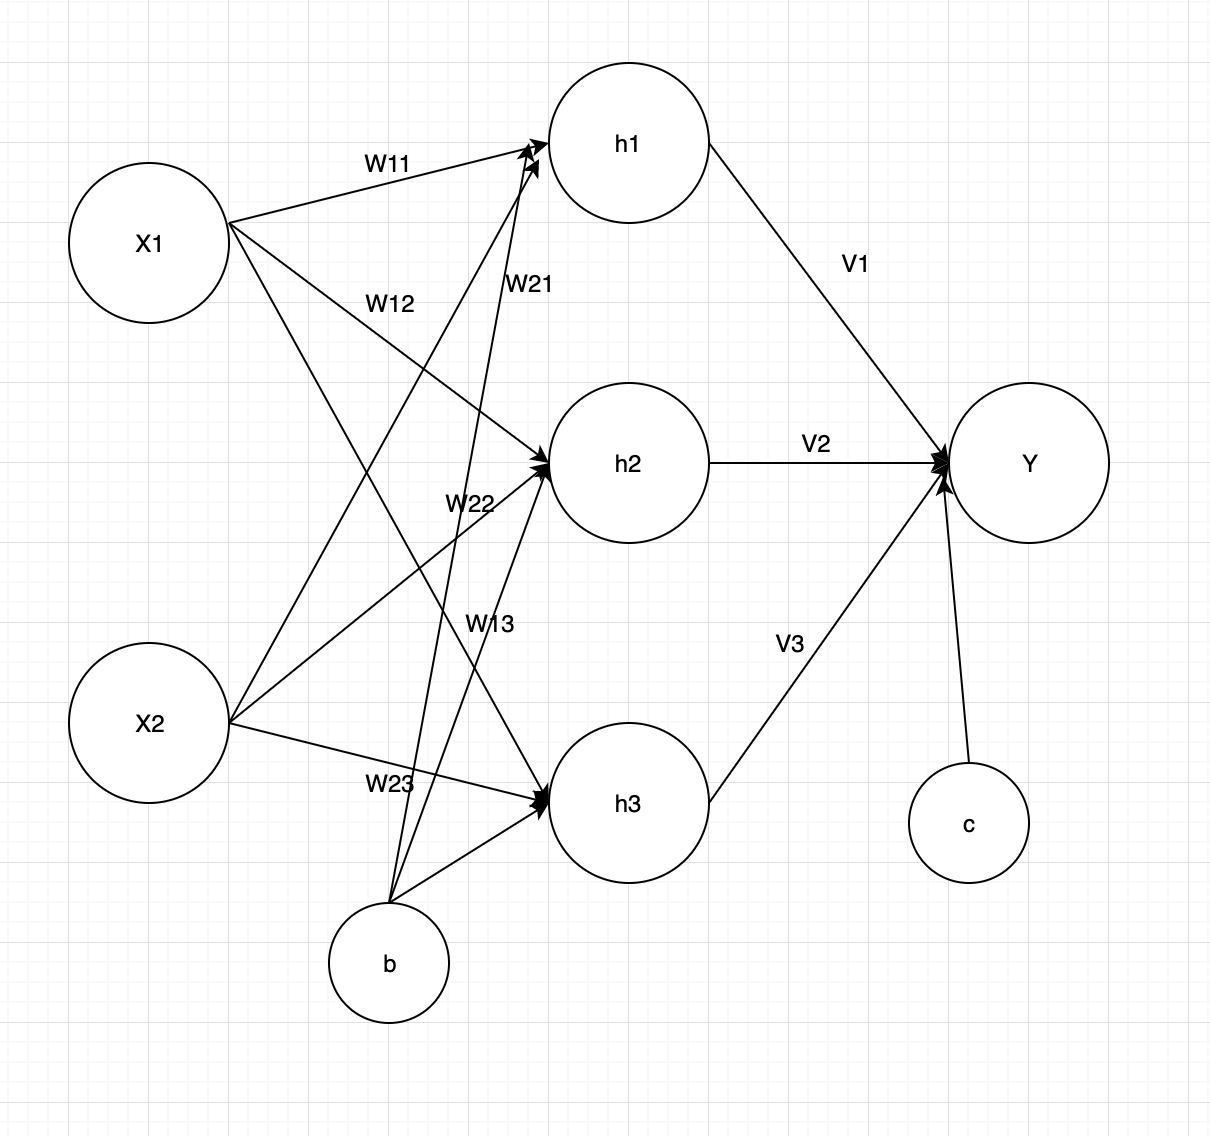

#### Question 2

Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).

We know that the activation function for hidden layer 1 is ReLu and the activation function for output is sigmoid since this is a binary classification problem.

$h_1=max(0, X_1W_{11}+X_2W_{21}+b_1)$

$h_2=max(0, X_1W_{12}+X_2W_{22}+b_2)$

$h_3=max(0, X_1W_{13}+X_2W_{23}+b_3)$

$Y_{in}=V_1h_1+V_2h_2+V_3h_3+c$

$\hat Y=\frac{1}{1+e^{-(V_1h_1+V_2h_2+V_3h_3+c)}}=\frac{1}{1+e^{-(V_1max(0, X_1W_{11}+X_2W_{21}+b_1)+V_2max(0, X_1W_{12}+X_2W_{22}+b_2)+V_3max(0, X_1W_{13}+X_2W_{23}+b_3)+c)}}$

#### Question 3

Write out the forward-pass function in python, call it ff_nn__ReLu(...)

In [1]:
import numpy as np

In [2]:
def ff_nn__ReLu(W, X, b, V, c):
    H = np.maximum(np.dot(X, W) + b, 0)
    Yin = np.dot(H, V) + c
    Y = 1/(1 + np.exp(-Yin))
    return Y

#### Question 4

Suppose you have the following set of weight matrices:

$$W^{(1)}=\left[\begin{matrix}1 & -1 & 0 \cr 0 & 0 & 0.5\end{matrix}\right] \,\,\,\,\,\, b^{(1)}=\left[\begin{matrix}0 & 0 & 1\end{matrix}\right]^T$$

$$V=\left[\begin{matrix}1 \cr 0 \cr -1\end{matrix}\right] \,\,\,\,\,\, c=\left[\begin{matrix}1 \end{matrix}\right]$$ 

and a few inputs:
$$X=\left[\begin{matrix}1 & -1 \cr 0 & -1 \cr 0 & 1\end{matrix}\right]$$ 

what are the class probabilities associated with the forward pass of each sample?

In [3]:
# Input variables
X = np.array([[1, -1], [0, -1], [0, 1]])
W = np.array([[1, -1, 0], [0, 0, 0.5]])
b = np.array([0, 0, 1])
V = np.array([1, 0, -1])
c = np.array([1])

# Call the function
P=ff_nn__ReLu(W, X, b, V, c)

In [4]:
print('The class probabilities associated with the forward pass of each sample are: \n'+str(P[0])+', '+str(P[1])+' and '+str(P[2])+'.')

The class probabilities associated with the forward pass of each sample are: 
0.8175744761936437, 0.6224593312018546 and 0.3775406687981454.


### Part2 Gradient Descent

Consider a simple non-convex function of two variables: 
$$f(x,y)=(1−x^3)+100∗(y^2 - x)^2$$

#### Question 1
What are the partial derivatives of f with respect to x and to y?

$$\frac{\partial f}{\partial x}=(0-3x^2)+100*2(y^2-x)(0-1)=-3x^2-200(y^2-x)=-200y^2-3x^2+200x$$
$$\frac{\partial f}{\partial y}=(0-0)+100*2(y^2-x)(2y)=0+400y(y^2-x)=400y^3-400xy$$

#### Question 2
Create a visualization of the contours of this function.

In [5]:
# Generate Xs and Ys
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

# Write function
def f(x, y):
    return (1-x**3)+100*(y**2-x)**2

# Calculate f(x, y)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [6]:
import matplotlib.pyplot as plt

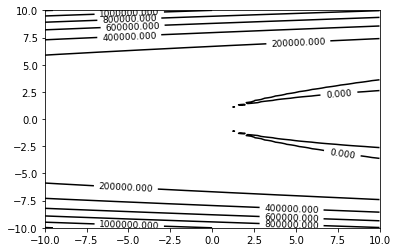

In [7]:
# Plot contours of this function
fig, ax = plt.subplots()
plot1 = ax.contour(X, Y, Z, 6, colors='black');
ax.clabel(plot1, fontsize=9, inline=1);

#### Question 3
Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [8]:
# Partial derivatives of f with respect to x 
def partial_x(x, y):
    return -200*y**2-3*x**2+200*x

# Partial derivatives of f with respect to y 
def partial_y(x, y):
    return 400*y**3-400*x*y

In [9]:
# Function for Gradient Descent
def Gradient_Descent_1(x, y, learning_rate, iterations):
    X = [x]
    Y = [y]
    Z = [f(x, y)]
    
    for i in range(0, iterations):
        x_ = x
        y_ = y
        
        x = x_-learning_rate*partial_x(x_,y_)
        y = y_-learning_rate*partial_y(x_,y_)
     
        X.append(x)
        Y.append(y)
        Z.append(f(x, y))
    
    return X, Y, Z

In [10]:
# Plot the graph
def graph1(learning_rate):
    
    x, y, z = Gradient_Descent_1(0, -1, learning_rate, 100)
    
    X, Y = np.array(x), np.array(y)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)
    
    plt.figure(figsize = (20, 5))

    plt.subplot(1, 2, 1)
    plt.plot(z,'.-')
    plt.title('f(x,y) change with learning rate ' + str(learning_rate))
    plt.ylabel('f(x,y)')
    plt.xlabel('Iteration')

    ax = plt.subplot(1, 2, 2)
    ax.plot(x,y,'o')
    graph = ax.contour(X, Y, Z, 6, colors='black');
    ax.clabel(graph, fontsize=9, inline=1);
    plt.title('Contours plot with learning rate ' + str(learning_rate))
    plt.show()

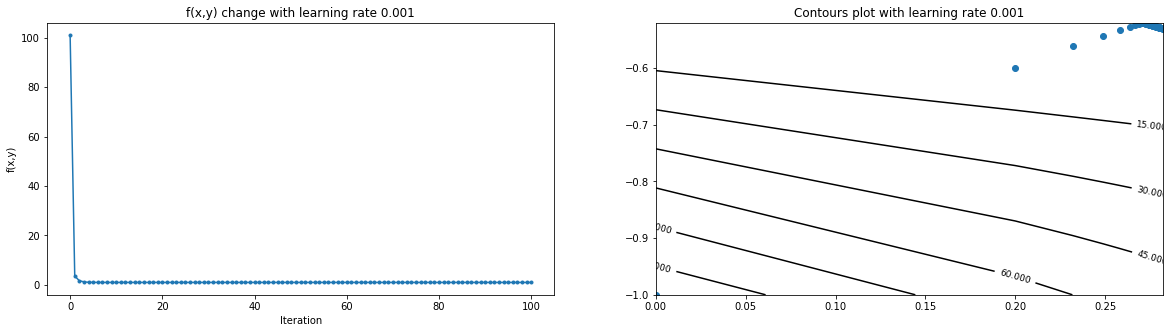

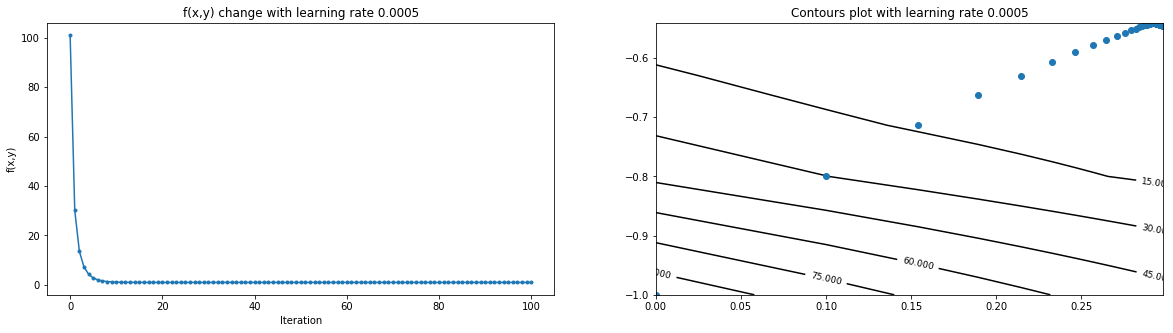

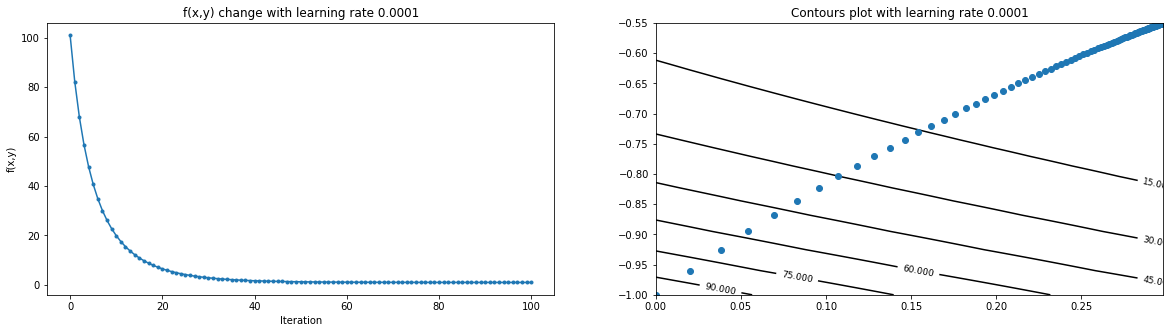

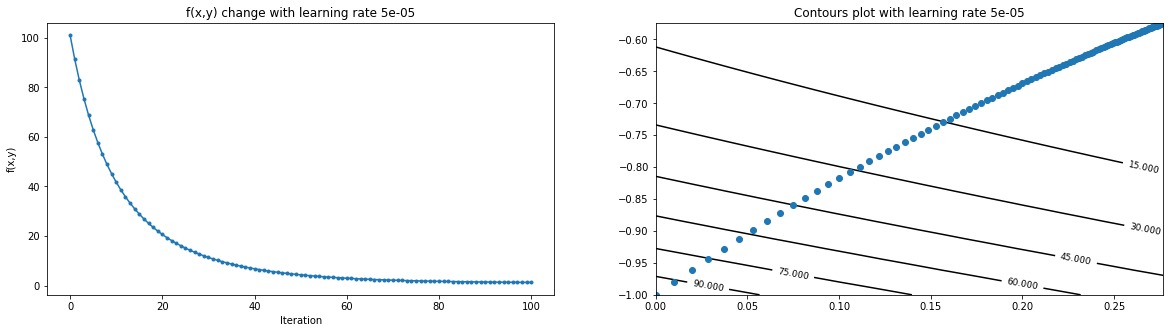

In [11]:
for rate in [0.001, 0.0005, 0.0001, 0.00005]:
    graph1(rate)

#### Question 4
Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s hyperparameters.

In [12]:
# Function for Gradient Descent with momentum
def Gradient_Descent_2(x, y, learning_rate, iterations, alpha, v):
    X = [x]
    Y = [y]
    Z = [f(x, y)]
    
    v_x, v_y = 0, 0
    vx, vy = v, v
    
    for i in range(0, iterations):
        x_ = x
        y_ = y
        v_x += vx
        v_y += vx
        
        vx = alpha*v_x - learning_rate*partial_x(x_,y_)
        vy = alpha*v_x - learning_rate*partial_y(x_,y_)
        
        x = x_ + vx
        y = y_ + vy
     
        X.append(x)
        Y.append(y)
        Z.append(f(x, y))
    
    return X, Y, Z

In [13]:
# Plot the graph
def graph2(learning_rate, alpha, velocity):
    
    x, y, z = Gradient_Descent_2(0, -1, learning_rate, 100, alpha, velocity)
    
    X, Y = np.array(x), np.array(y)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)
    
    plt.figure(figsize = (20, 5))

    plt.subplot(1, 2, 1)
    plt.plot(z,'.-')
    plt.title('f(x,y) change with learning rate ' + str(learning_rate) + ', alpha ' + str(alpha) + ', velocity ' + str(velocity))
    plt.ylabel('f(x,y)')
    plt.xlabel('Iteration')

    ax = plt.subplot(1, 2, 2)
    ax.plot(x,y,'o')
    graph = ax.contour(X, Y, Z, 6, colors='black');
    ax.clabel(graph, fontsize=9, inline=1);
    plt.title('Contours plot with learning rate ' + str(learning_rate) + ', alpha ' + str(alpha) + ', velocity ' + str(velocity))
    plt.show()

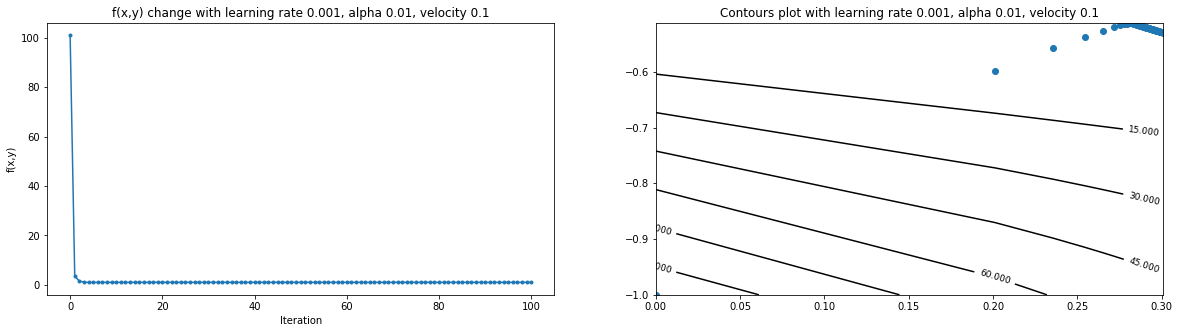

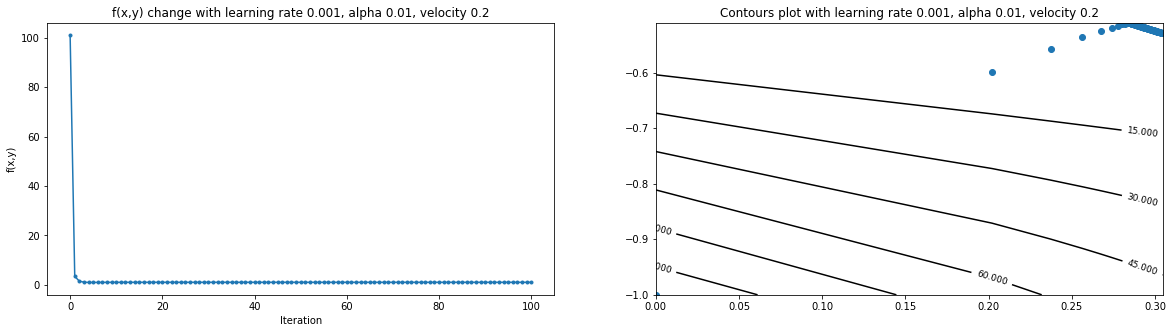

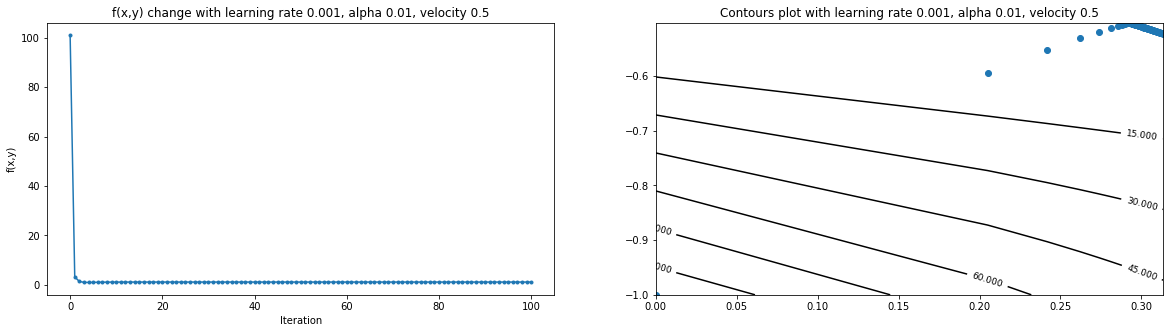

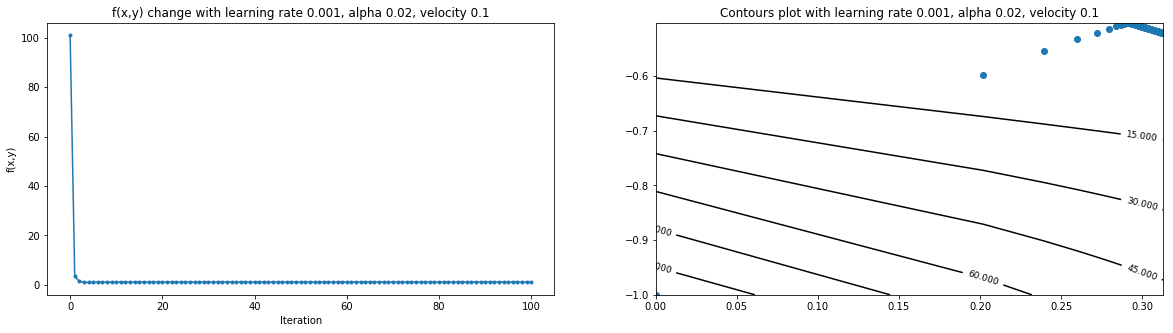

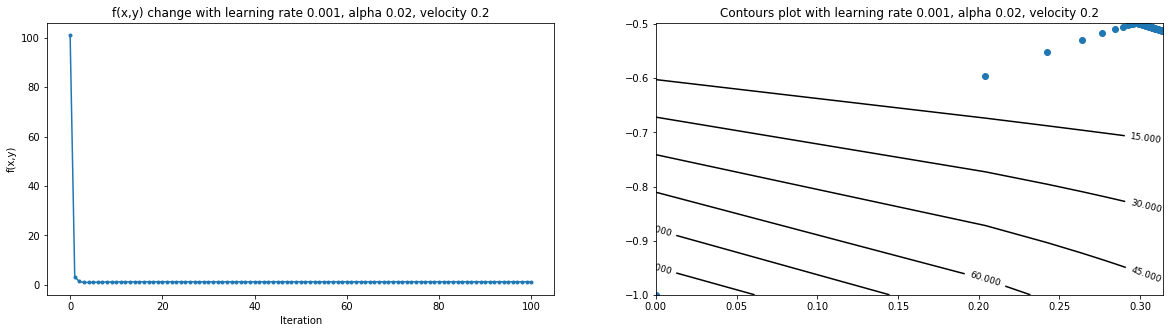

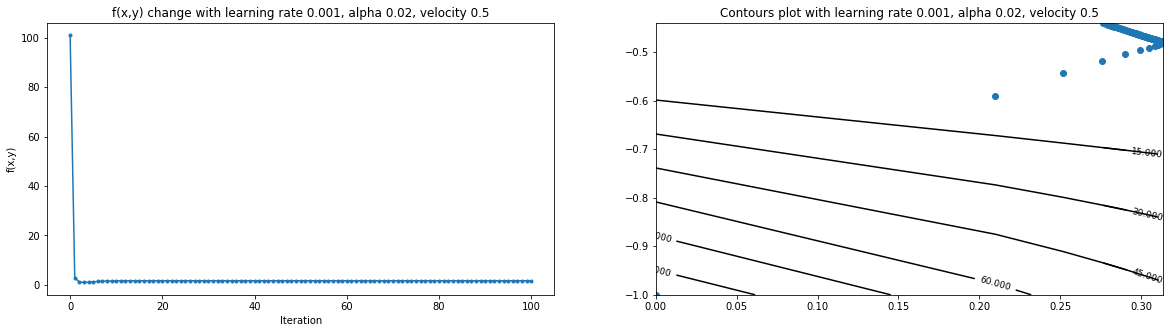

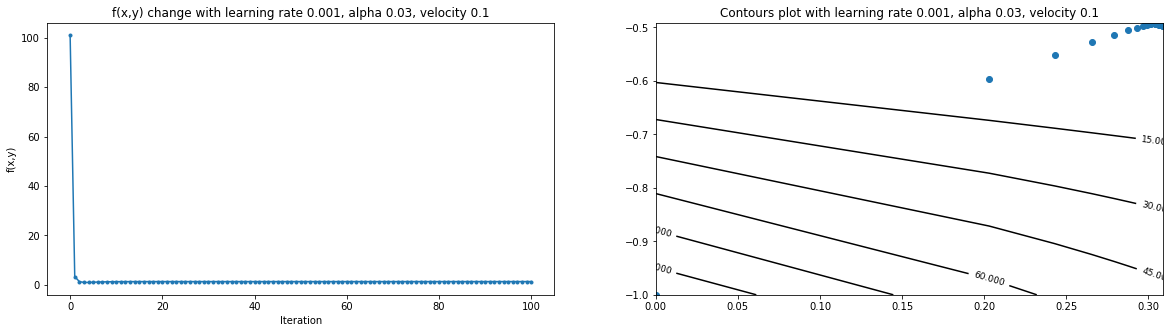

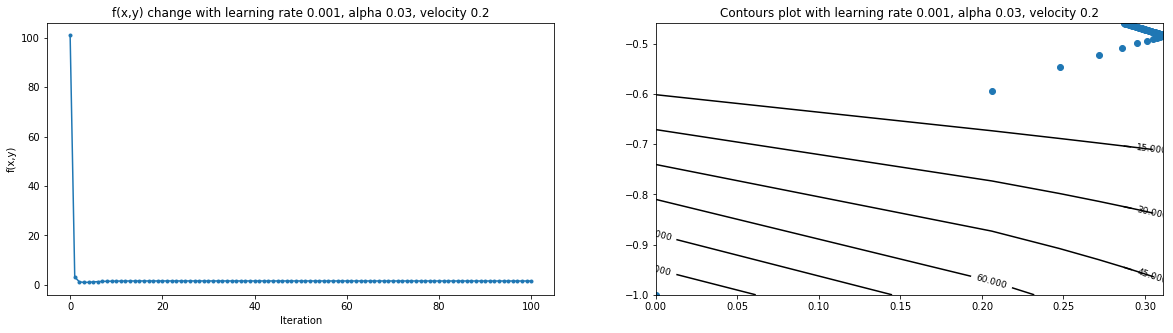

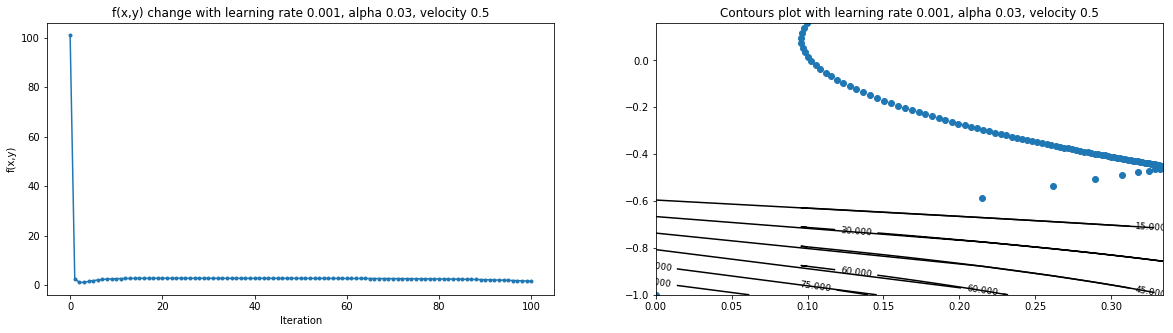

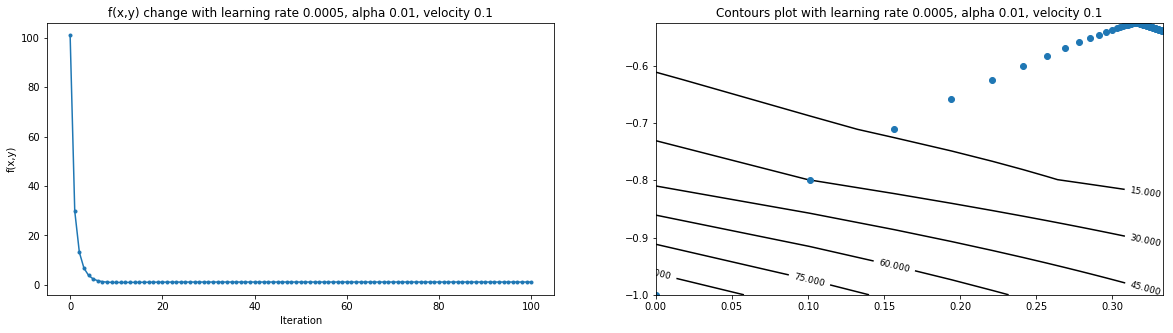

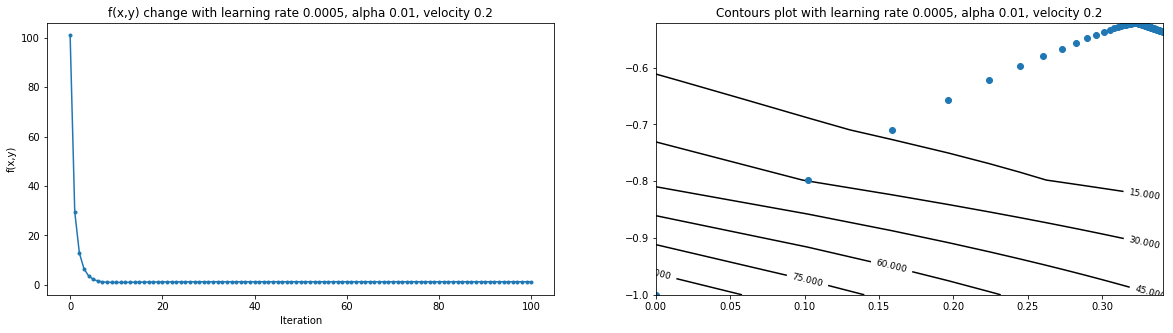

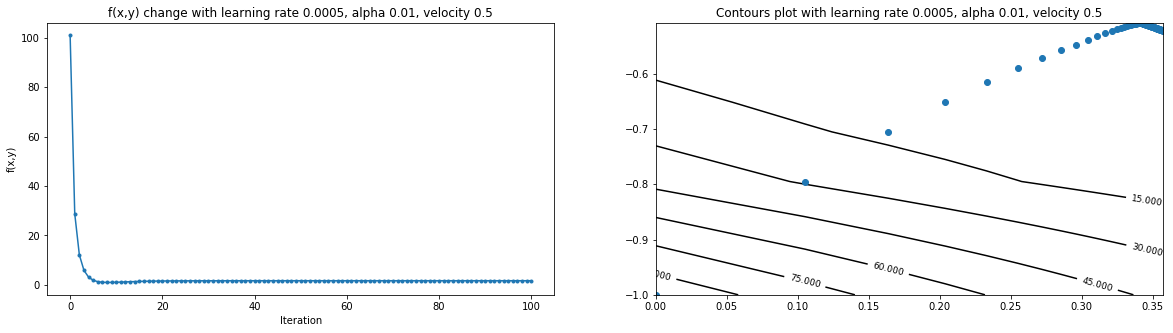

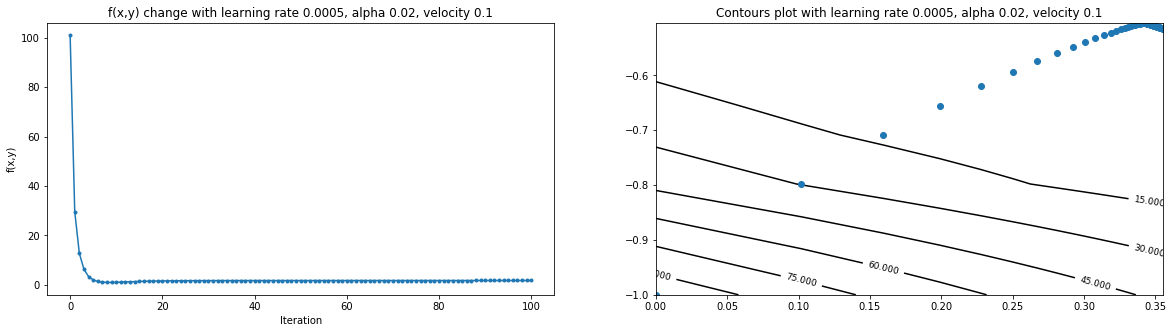

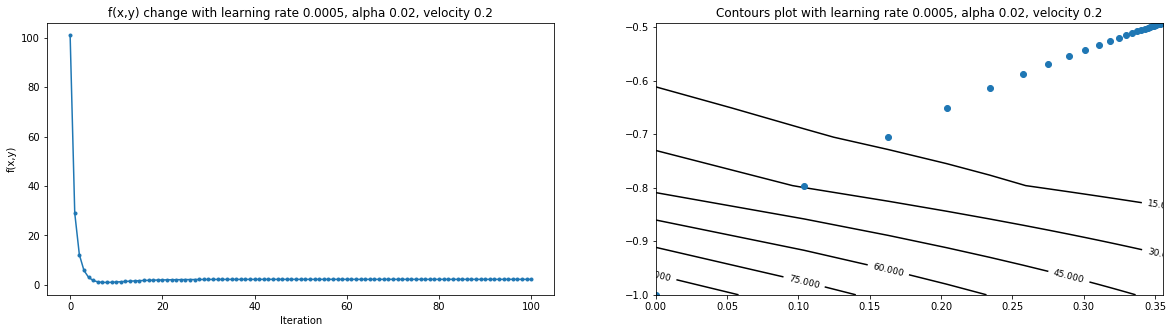

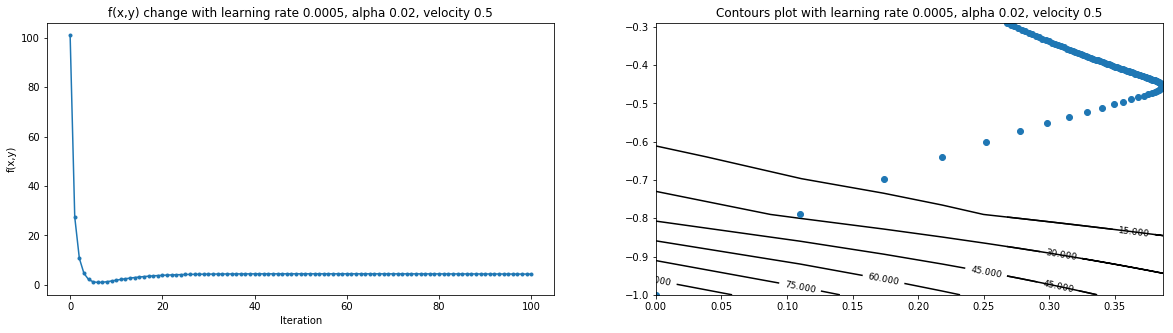

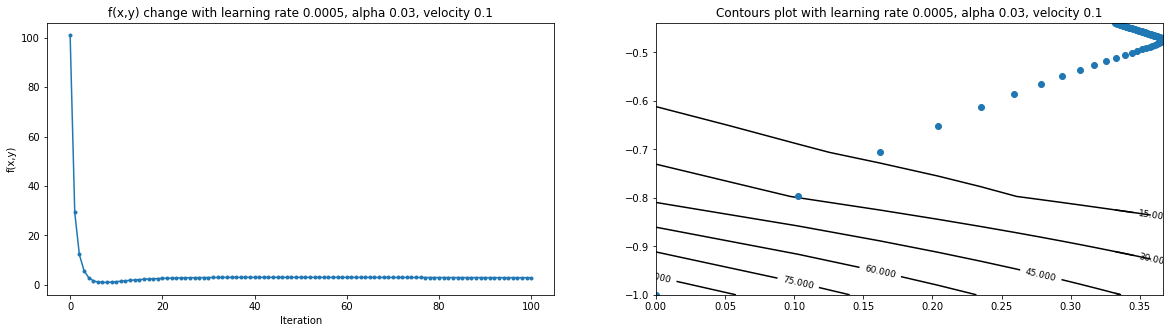

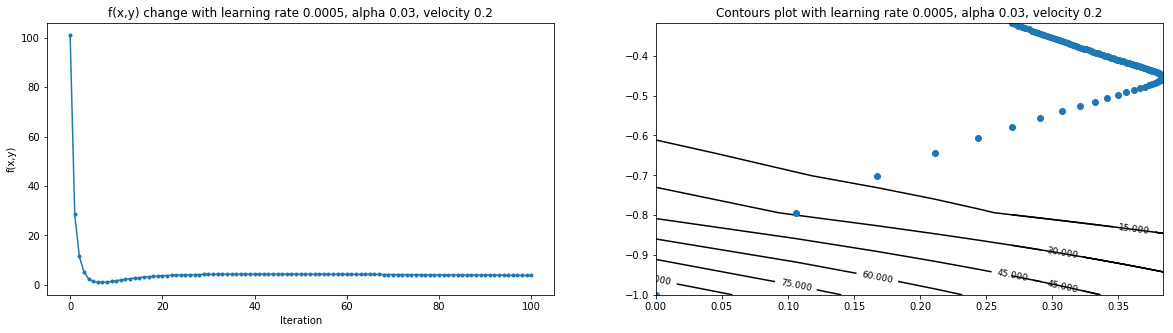

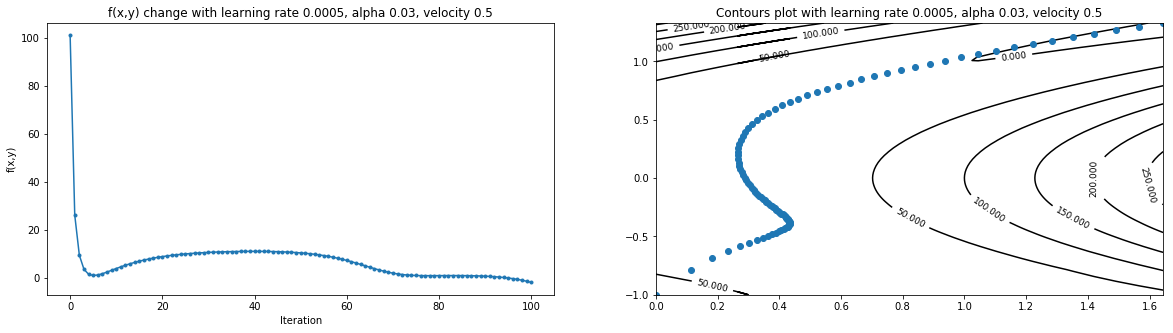

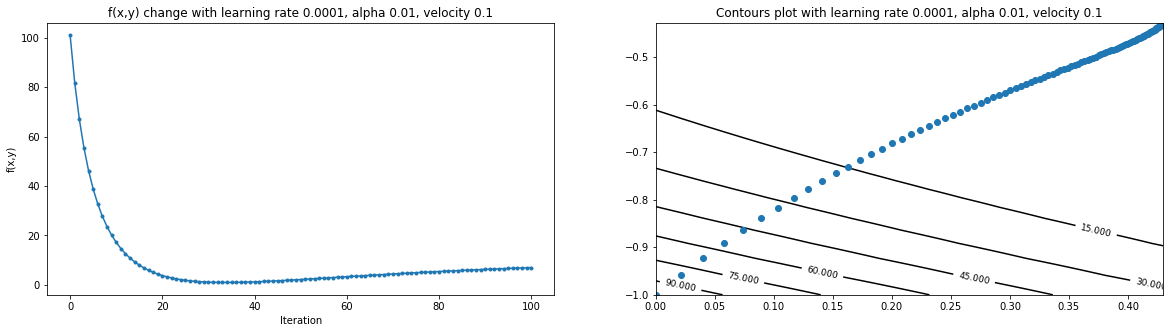

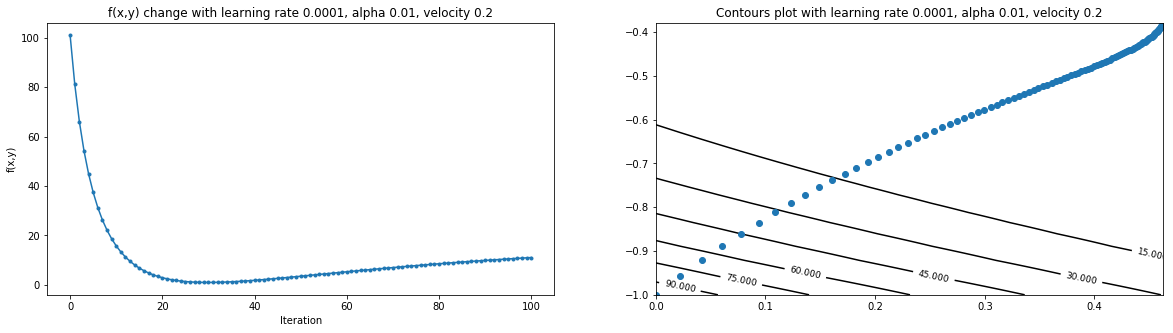

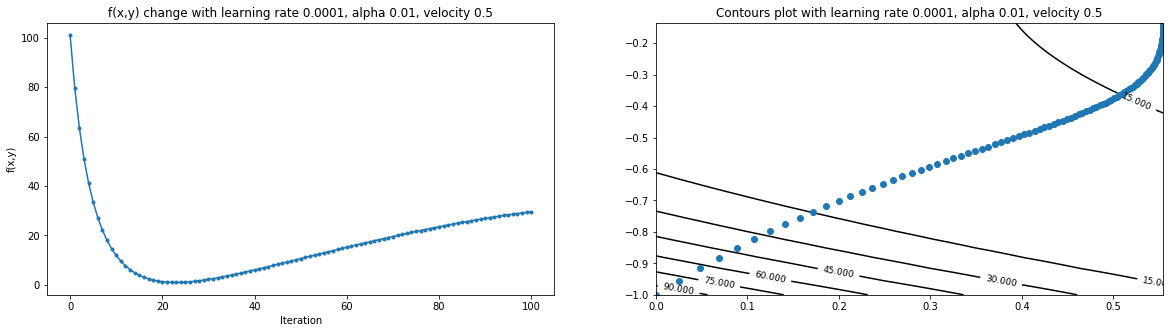

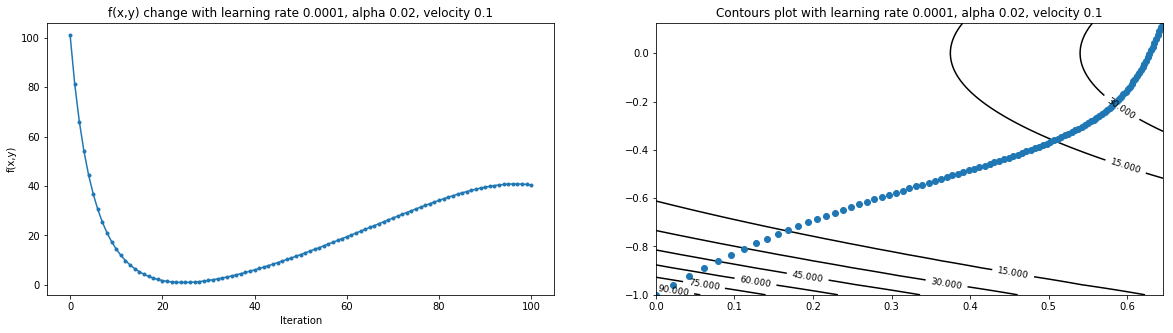

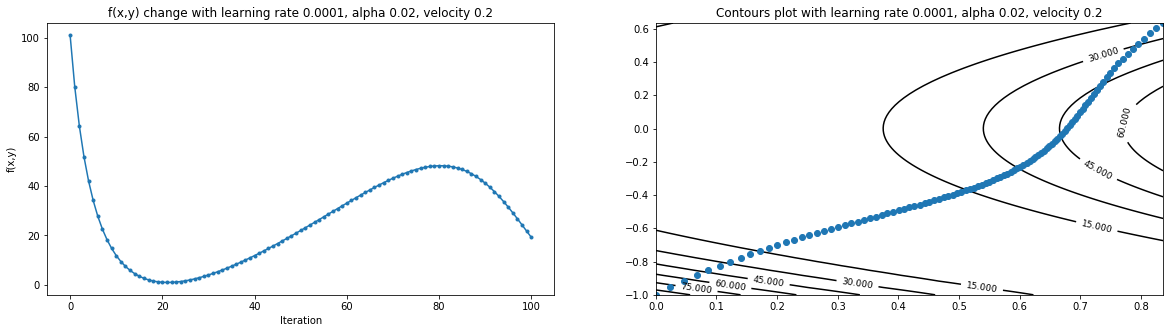

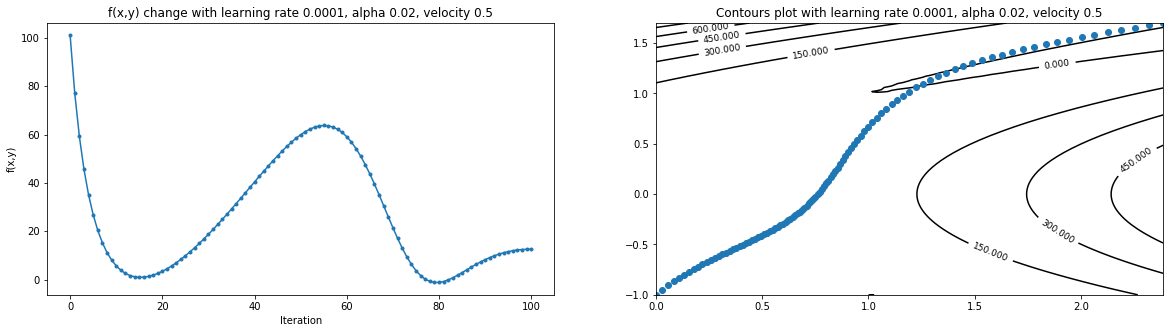

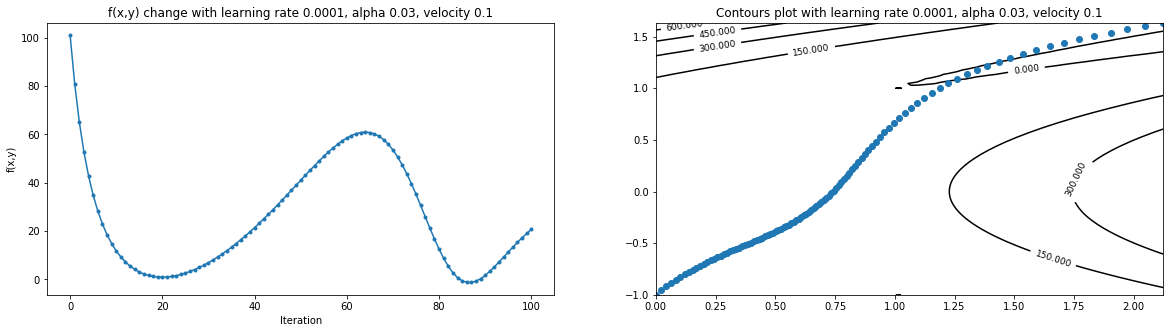

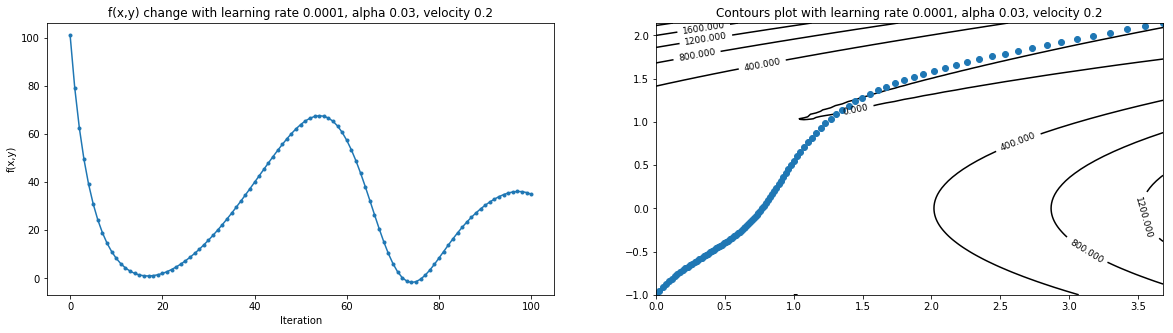

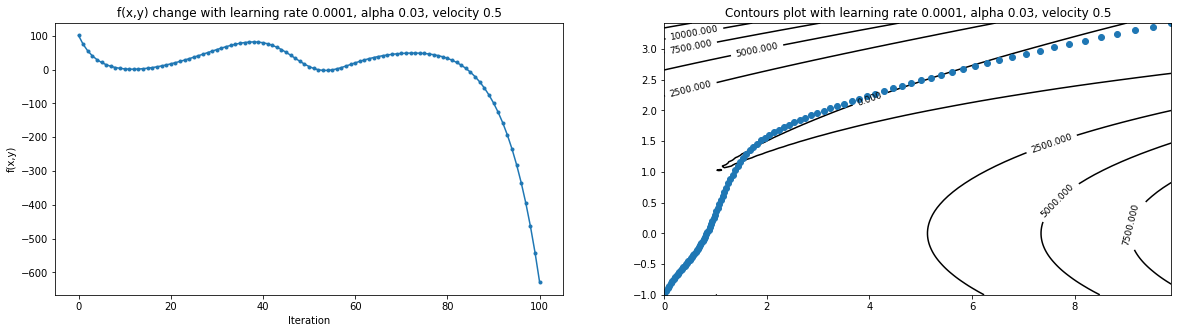

In [14]:
for rate in [0.001, 0.0005, 0.0001]:
    for alpha in [0.01, 0.02, 0.03]:
        for velocity in [0.1, 0.2, 0.5]:
            graph2(rate, alpha, velocity)

### Part3 Backprop

#### Question 1
For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

The Loss Function is Binary Entropy Loss : $L=-(y_ilog\hat y_i + (1-y_i)log(1- \hat y_i))$

$\frac{\partial L}{\partial W_{11}}= \frac{\partial L}{\partial \hat Y_{out}}*\frac{\partial \hat Y_{out}}{\partial \hat Y_{in}}*\frac{\partial \hat Y_{in}}{\partial h_{1out}} *\frac{\partial h_{1out}}{\partial h_{1in}}*\frac{\partial h_{1in}}{\partial W_{11}}=-(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i})\hat y_i(1-\hat y_i)V_1x_1$, if $x_1W_{11}+x_2W_{21}+b_1>0$ else $\frac{\partial L}{\partial W_{11}}=0$ 

$\frac{\partial L}{\partial W_{12}}= \frac{\partial L}{\partial \hat Y_{out}}*\frac{\partial \hat Y_{out}}{\partial \hat Y_{in}}*\frac{\partial \hat Y_{in}}{\partial h_{2out}} *\frac{\partial h_{2out}}{\partial h_{2in}}*\frac{\partial h_{2in}}{\partial W_{12}}=-(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i})\hat y_i(1-\hat y_i)V_2x_1$, if $x_1W_{12}+x_2W_{22}+b_2>0$ else $\frac{\partial L}{\partial W_{12}}=0$ 

$\frac{\partial L}{\partial W_{13}}= \frac{\partial L}{\partial \hat Y_{out}}*\frac{\partial \hat Y_{out}}{\partial \hat Y_{in}}*\frac{\partial \hat Y_{in}}{\partial h_{3out}} *\frac{\partial h_{3out}}{\partial h_{3in}}*\frac{\partial h_{3in}}{\partial W_{13}}=-(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i})\hat y_i(1-\hat y_i)V_3x_1$, if $x_1W_{13}+x_2W_{23}+b_3>0$ else $\frac{\partial L}{\partial W_{13}}=0$

$\frac{\partial L}{\partial W_{21}}= \frac{\partial L}{\partial \hat Y_{out}}*\frac{\partial \hat Y_{out}}{\partial \hat Y_{in}}*\frac{\partial \hat Y_{in}}{\partial h_{1out}} *\frac{\partial h_{1out}}{\partial h_{1in}}*\frac{\partial h_{1in}}{\partial W_{21}}=-(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i})\hat y_i(1-\hat y_i)V_1x_2$, if $x_1W_{11}+x_2W_{21}+b_1>0$ else $\frac{\partial L}{\partial W_{21}}=0$

$\frac{\partial L}{\partial W_{22}}= \frac{\partial L}{\partial \hat Y_{out}}*\frac{\partial \hat Y_{out}}{\partial \hat Y_{in}}*\frac{\partial \hat Y_{in}}{\partial h_{2out}} *\frac{\partial h_{2out}}{\partial h_{2in}}*\frac{\partial h_{2in}}{\partial W_{22}}=-(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i})\hat y_i(1-\hat y_i)V_2x_2$, if $x_1W_{12}+x_2W_{22}+b_2>0$ else $\frac{\partial L}{\partial W_{22}}=0$

$\frac{\partial L}{\partial W_{23}}= \frac{\partial L}{\partial \hat Y_{out}}*\frac{\partial \hat Y_{out}}{\partial \hat Y_{in}}*\frac{\partial \hat Y_{in}}{\partial h_{3out}} *\frac{\partial h_{3out}}{\partial h_{3in}}*\frac{\partial h_{3in}}{\partial W_{23}}=-(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i})\hat y_i(1-\hat y_i)V_3x_2$, if $x_1W_{13}+x_2W_{23}+b_3>0$ else $\frac{\partial L}{\partial W_{23}}=0$


$\frac{\partial L}{\partial V_1}= \frac{\partial L}{\partial \hat Y_{out}}*\frac{\partial \hat Y_{out}}{\partial \hat Y_{in}}*\frac{\partial \hat Y_{in}}{\partial V_{1}}=-(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i})\hat y_i(1-\hat y_i)h_1$

$\frac{\partial L}{\partial V_2}= \frac{\partial L}{\partial \hat Y_{out}}*\frac{\partial \hat Y_{out}}{\partial \hat Y_{in}}*\frac{\partial \hat Y_{in}}{\partial V_{2}}=-(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i})\hat y_i(1-\hat y_i)h_2$

$\frac{\partial L}{\partial V_3}= \frac{\partial L}{\partial \hat Y_{out}}*\frac{\partial \hat Y_{out}}{\partial \hat Y_{in}}*\frac{\partial \hat Y_{in}}{\partial V_{3}}=-(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i})\hat y_i(1-\hat y_i)h_3$

$\frac{\partial L}{\partial c}= \frac{\partial L}{\partial \hat Y_{out}}*\frac{\partial \hat Y_{out}}{\partial \hat Y_{in}}*\frac{\partial \hat Y_{in}}{\partial c}=-(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i})\hat y_i(1-\hat y_i)$

$\frac{\partial L}{\partial b_1}= \frac{\partial L}{\partial \hat Y_{out}}*\frac{\partial \hat Y_{out}}{\partial \hat Y_{in}}*\frac{\partial \hat Y_{in}}{\partial h_{1out}} *\frac{\partial h_{1out}}{\partial h_{1in}}*\frac{\partial h_{1in}}{\partial b_1}=-(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i})\hat y_i(1-\hat y_i)V_1$, if $x_1W_{11}+x_2W_{21}+b_1>0$ else $\frac{\partial L}{\partial b_1}=0$ 

$\frac{\partial L}{\partial b_2}= \frac{\partial L}{\partial \hat Y_{out}}*\frac{\partial \hat Y_{out}}{\partial \hat Y_{in}}*\frac{\partial \hat Y_{in}}{\partial h_{2out}} *\frac{\partial h_{2out}}{\partial h_{2in}}*\frac{\partial h_{2in}}{\partial b_2}=-(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i})\hat y_i(1-\hat y_i)V_2$, if $x_1W_{12}+x_2W_{22}+b_2>0$ else $\frac{\partial L}{\partial b_{2}}=0$

$\frac{\partial L}{\partial b_3}= \frac{\partial L}{\partial \hat Y_{out}}*\frac{\partial \hat Y_{out}}{\partial \hat Y_{in}}*\frac{\partial \hat Y_{in}}{\partial h_{3out}} *\frac{\partial h_{3out}}{\partial h_{3in}}*\frac{\partial h_{3in}}{\partial b_{3}}=-(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i})\hat y_i(1-\hat y_i)V_3$, if $x_1W_{13}+x_2W_{23}+b_3>0$ else $\frac{\partial L}{\partial b_{3}}=0$

#### Question 2
Write a function grad_f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [15]:
# Sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

# Loss function
def loss(y, y_hat):
    return -((y/y_hat)-(1-y)/(1-y_hat))

# Hidden layer function
def Hidden(x, W, b):
    h_in = np.dot(x,W)+b
    h_out = np.where(h_in>0, h_in, 0)
    return h_out

# Output layer function
def Output(H, V, c):
    return np.dot(H,V)+c

# Gradient of the Loss at that location
def grad_f(Weight, x, y):
    
    W=np.reshape(Weight[:6], (2, 3))
    B=Weight[6:9]
    V=Weight[9:12]
    c=Weight[12]
    
    H=Hidden(x, W, B)
    Z=Output(H, V, c)
    yhat=sigmoid(Z)
    Loss=loss(y, yhat)
    
    # Gradient of the Loss for each W
    V1=np.reshape(V, (1, 3))
    X1=np.reshape(x, (2, 1))
    W_Gra=Loss*yhat*(1-yhat)*np.dot(X1, V1)
    
    # Gradient of the Loss for each V
    V_Gra=Loss*yhat*(1-yhat)*H
    
    # Gradient of the Loss for each b
    b_Gra=Loss*yhat*(1-yhat)*np.array(V)
    
    # Gradient of the Loss for c
    c_Gra=Loss*yhat*(1-yhat)

    return W_Gra, V_Gra, b_Gra, c_Gra

In [16]:
Weight=[1, -1, 0, 0, 0, 0.5, 0, 0, 1, 1, 0, -1, 1]
X = np.array([1, -1])
Y = 0

W_loss, V_loss, b_loss, c_loss = grad_f(Weight, X, Y)
print(W_loss, V_loss, b_loss, c_loss)

[[ 0.81757448  0.         -0.81757448]
 [-0.81757448  0.          0.81757448]] [0.81757448 0.         0.40878724] [ 0.81757448  0.         -0.81757448] 0.8175744761936437


#### Question 3
Generate a synthetic dataset like the XOR pattern (see below).
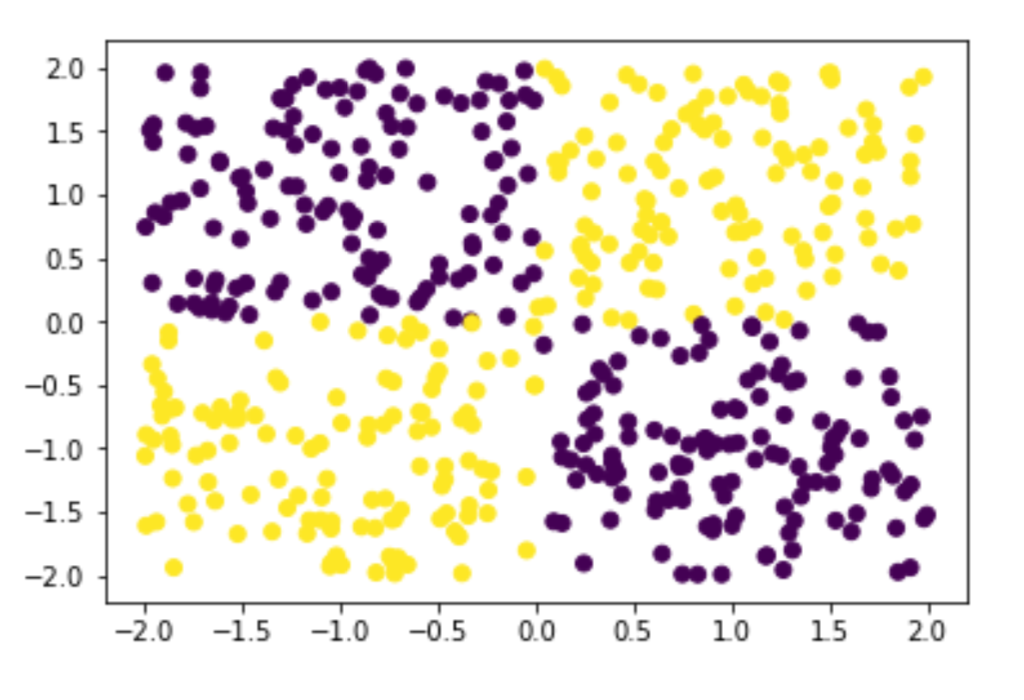

In [17]:
# Generate Data
n = 600
X = np.random.uniform(-2,2,n*2).reshape(n,2)
Y = [1] * n
Z = ['Yellow'] * n

for i, x in enumerate(X):
    if x[0]*x[1]<0:
        Y[i] = 0
        Z[i] = 'Purple'

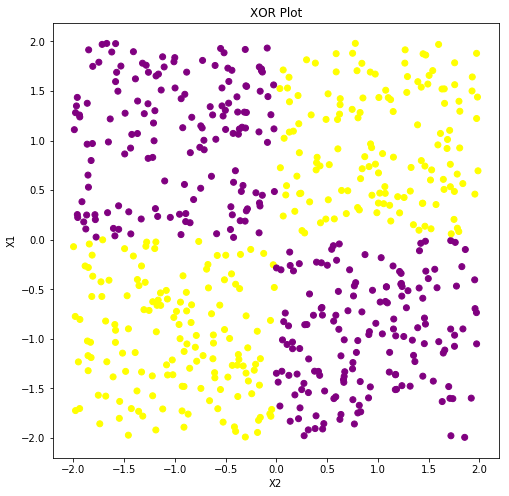

In [18]:
# Plot the result
plt.figure(figsize = (8, 8))

plt.scatter(X[:, 0], X[:, 1], color=Z)
plt.title('XOR Plot')
plt.ylabel('X1')
plt.xlabel('X2')
plt.show()

#### Question 4
Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [19]:
# Modify the Q2 a little bit and write a new function
def Partial_Derivative(x, y, W, B, V, c):
    H=Hidden(x, W, B)
    Z=Output(H, V, c)
    yhat=sigmoid(Z)
    Loss=loss(y, yhat)
    
    # Gradient of the Loss for each W
    V1=np.reshape(V, (1, 3))
    X1=np.reshape(x, (2, 1))
    W_Gra=Loss*yhat*(1-yhat)*np.dot(X1, V1)
    
    # Gradient of the Loss for each V
    V_Gra=Loss*yhat*(1-yhat)*H
    
    # Gradient of the Loss for each b
    b_Gra=Loss*yhat*(1-yhat)*np.array(V)
    
    # Gradient of the Loss for c
    c_Gra=Loss*yhat*(1-yhat)

    return W_Gra, V_Gra, b_Gra, c_Gra, Loss, yhat

In [20]:
def Gradient_Descent_3(X, Y, learning_rate, iterations, Weight):
    
    # Extract parameters from weight vector
    W=np.reshape(Weight[:6], (2, 3))
    B=Weight[6:9]
    V=Weight[9:12]
    C=Weight[12]
    
    # Keep track of Loss
    Loss_res = []
    
    for i in range(0, iterations):
        
        # Keep track of sum for each parameters
        sum_loss = 0
        W_sum = np.zeros(shape=(2,3))
        B_sum = np.zeros(shape=(3))
        V_sum = np.zeros(shape=(3))
        C_sum = 0
        
        # Compute loss and partial derivative for each data point
        for j in range(0, len(Y)):
            
            W_loss, V_loss, B_loss, C_loss, Loss, yhat = Partial_Derivative(X[j], Y[j], W, B, V, C)
            
            W_sum += W_loss
            V_sum += V_loss
            C_sum += C_loss
            B_sum += B_loss
            sum_loss += Loss
        
        # Update the parameters
        W -= learning_rate*W_sum/len(Y)
        V -= learning_rate*V_sum/len(Y)
        B -= learning_rate*B_sum/len(Y)
        C -= learning_rate*C_sum/len(Y)
        
        # Append total loss
        Loss_res.append(sum_loss)
    
    return Loss_res

In [21]:
# Set initial weight as the same in problem 1
Weight=[1, -1, 0, 0, 0, 0.5, 0, 0, 1, 1, 0, -1, 1]

# Calculate the total loss
Total_Loss=Gradient_Descent_3(X, Y, 0.01, 800, Weight)

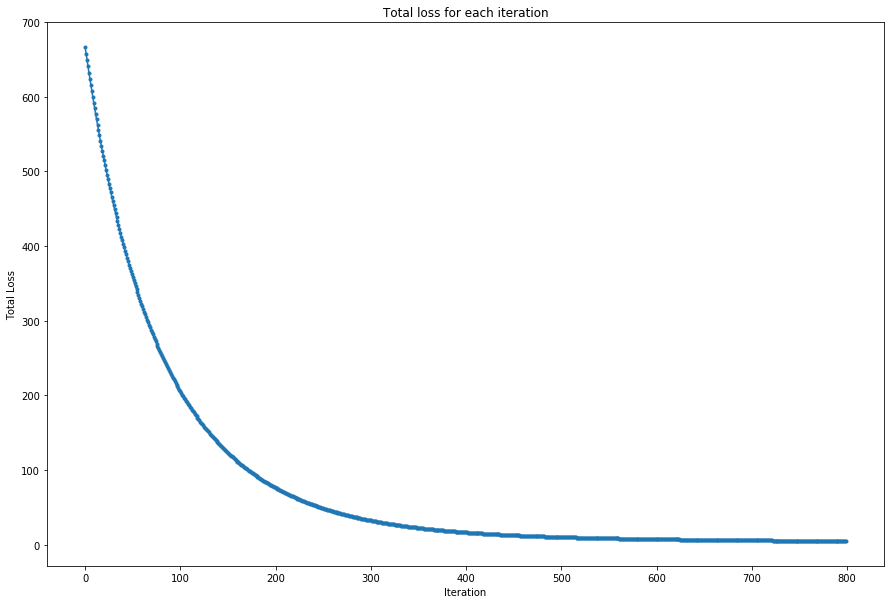

In [22]:
# Plot the loss
plt.figure(figsize = (15, 10))

plt.plot(Total_Loss, '.-')
plt.title('Total loss for each iteration')
plt.ylabel('Total Loss')
plt.xlabel('Iteration')
plt.show()

#### Question 5
Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

In [23]:
def Gradient_Descent_4(X, Y, learning_rate, iterations, Weight, alpha):
    
    # Extract parameters from weight vector
    W=np.reshape(Weight[:6], (2, 3))
    B=Weight[6:9]
    V=Weight[9:12]
    C=Weight[12]
    
    # Initialize velocity
    Wv = np.zeros(shape=(2,3))
    Bv = np.zeros(shape=(3))
    Vv = np.zeros(shape=(3))
    Cv = 0
    
    # Keep track of Loss
    Loss_res = []
    
    for i in range(0, iterations):
        
        # Keep track of sum for each parameters
        sum_loss = 0
        W_sum = np.zeros(shape=(2,3))
        B_sum = np.zeros(shape=(3))
        V_sum = np.zeros(shape=(3))
        C_sum = 0
        y_hat = []
        
        # Compute loss and partial derivative for each data point
        for j in range(0, len(Y)):
            
            W_loss, V_loss, B_loss, C_loss, Loss, yhat = Partial_Derivative(X[j], Y[j], W, B, V, C)
            
            W_sum += W_loss
            V_sum += V_loss
            C_sum += C_loss
            B_sum += B_loss
            sum_loss += Loss
            
            y_hat.append(yhat)
        
        # Update the velocity
        Wv = alpha*Wv - learning_rate*W_sum/len(Y)
        Vv = alpha*Vv - learning_rate*V_sum/len(Y)
        Bv = alpha*Bv - learning_rate*B_sum/len(Y)
        Cv = alpha*Cv - learning_rate*C_sum/len(Y)
        
        # Update the parameters
        W += Wv
        V += Vv
        B += Bv
        C += Cv
        
        # Append total loss
        Loss_res.append(sum_loss)
    
    return Loss_res, y_hat

In [24]:
# Set initial weight as the same in problem 1
Weight=[1, -1, 0, 0, 0, 0.5, 0, 0, 1, 1, 0, -1, 1]

# Calculate the total loss
Total_Loss2, y_hat2=Gradient_Descent_4(X, Y, 0.01, 800, Weight, 0.2)
Total_Loss3, y_hat3=Gradient_Descent_4(X, Y, 0.01, 800, Weight, 0.5)
Total_Loss4, y_hat4=Gradient_Descent_4(X, Y, 0.01, 800, Weight, 0.8)

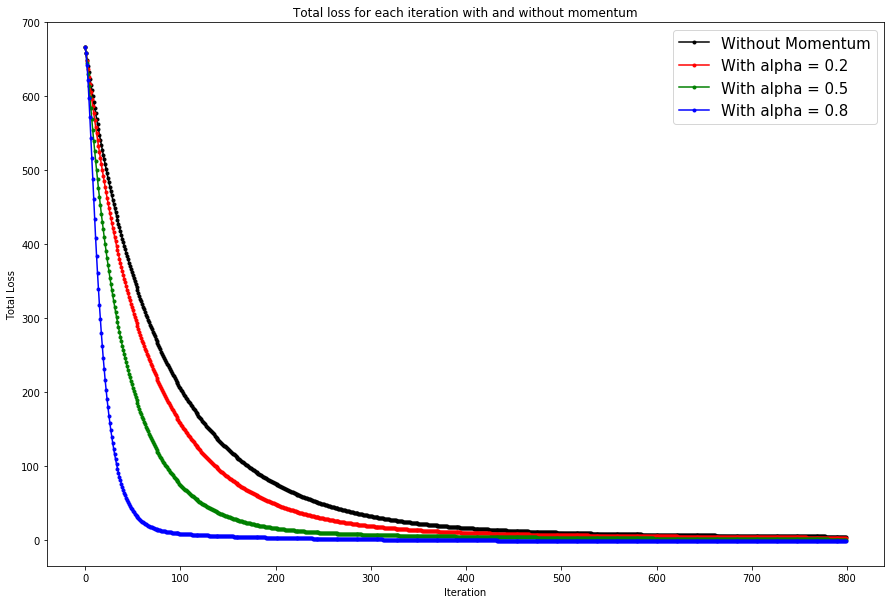

In [25]:
# Plot the loss
plt.figure(figsize = (15, 10))

plt.plot(Total_Loss, '.-', color = 'black')
plt.plot(Total_Loss2, '.-', color = 'red')
plt.plot(Total_Loss3, '.-', color = 'green')
plt.plot(Total_Loss4, '.-', color = 'blue')

plt.title('Total loss for each iteration with and without momentum')
plt.ylabel('Total Loss')
plt.xlabel('Iteration')
plt.legend(['Without Momentum','With alpha = 0.2','With alpha = 0.5','With alpha = 0.8'], loc=1, prop={'size': 15})
plt.show()

#### From this graph we can see that algorithm with momentum converges more efficiently. When alpha is bigger, it converges faster.

#### Question 6
Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.

In [26]:
# Assign label
# Set decision boundary as 0.5
predict_z = ['Yellow']*n

for i in range(len(y_hat4)):
    if y_hat4[i] < 0.5:
        predict_z[i] = 'Purple'

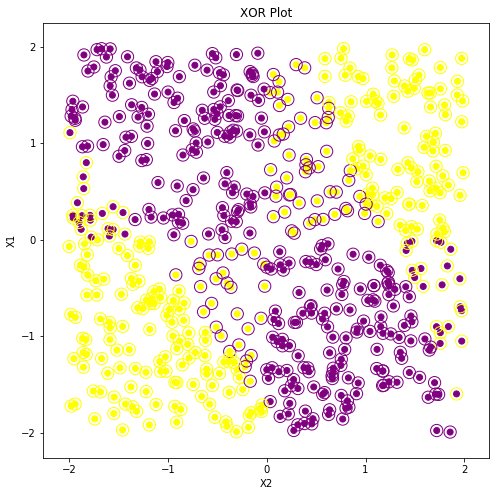

In [29]:
# Plot the result
plt.figure(figsize = (8, 8))

plt.scatter(X[:, 0], X[:, 1], color=Z)
plt.scatter(X[:,0], X[:,1], color='', marker='o', edgecolors=predict_z, s=150)
plt.title('XOR Plot')
plt.ylabel('X1')
plt.xlabel('X2')
plt.show()

From the graph we can see that this neutral network can classify most of the points correctly.